In [4]:
import pandas as pd

csv_path = "vmCloud_data.csv"
Cloud_data = pd.read_csv(csv_path)
print("Dataset loaded successfully.")
Cloud_data.head()


Dataset loaded successfully.


,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:54,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,2023-01-26 04:46:34,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,2023-01-13 23:39:47,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed
3,e672e32f-c134-4fbc-992b-34eb63bef6bf,2023-02-09 11:45:49,54.488318,88.100960,NaN,195.639954,5876.0,16.456670,0.529511,compute,high,completed
4,f38b8b50-6926-4533-be4f-89ad11624071,2023-06-14 08:27:26,42.365480,NaN,NaN,359.451537,3361.0,55.307992,0.351907,NaN,medium,waiting


In [5]:
print("Columns in dataset:", Cloud_data.columns.tolist())


Columns in dataset: ['vm_id', 'timestamp', 'cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency', 'task_type', 'task_priority', 'task_status']


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Fill numeric missing values with mean
Cloud_data.fillna(Cloud_data.mean(numeric_only=True), inplace=True)

# Fill categorical missing values with mode
for column in ['task_type', 'task_priority', 'task_status']:
    Cloud_data[column] = Cloud_data[column].fillna(Cloud_data[column].mode()[0])


In [7]:
columns_to_normalize = ['cpu_usage', 'memory_usage', 'network_traffic', 
                        'power_consumption', 'num_executed_instructions', 
                        'execution_time', 'energy_efficiency']

scaler = MinMaxScaler()
Cloud_data[columns_to_normalize] = scaler.fit_transform(Cloud_data[columns_to_normalize])

print("Normalization complete.")
Cloud_data.head()


Normalization complete.


,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status
0,c5215826-6237-4a33-9312-72c1df909881,2023-01-25 09:10:54,0.548813,0.789509,0.164776,0.575619,0.752775,0.693456,0.553589,network,medium,waiting
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,2023-01-26 04:46:34,0.715189,0.299019,0.500008,0.724548,0.534853,0.413960,0.349856,io,high,completed
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,2023-01-13 23:39:47,0.500122,0.927093,0.203675,0.462936,0.548355,0.246026,0.796277,io,medium,completed
3,e672e32f-c134-4fbc-992b-34eb63bef6bf,2023-02-09 11:45:49,0.544883,0.881010,0.500008,0.391280,0.587659,0.164567,0.529511,compute,high,completed
4,f38b8b50-6926-4533-be4f-89ad11624071,2023-06-14 08:27:26,0.423655,0.499819,0.500008,0.718904,0.336134,0.553080,0.351907,io,medium,waiting


In [8]:
from sklearn.preprocessing import LabelEncoder

label_columns = ['task_type', 'task_priority', 'task_status']
label_encoders = {}

for column in label_columns:
    le = LabelEncoder()
    Cloud_data[column] = le.fit_transform(Cloud_data[column])
    label_encoders[column] = le


In [9]:
Cloud_data['timestamp'] = pd.to_datetime(Cloud_data['timestamp'])
Cloud_data['hour_of_day'] = Cloud_data['timestamp'].dt.hour
Cloud_data['day_of_week'] = Cloud_data['timestamp'].dt.dayofweek


In [10]:
Cloud_data.sort_values('timestamp', inplace=True)
Cloud_data['cpu_usage_7d_avg'] = Cloud_data['cpu_usage'].rolling(window=7, min_periods=1).mean()
Cloud_data['memory_usage_7d_avg'] = Cloud_data['memory_usage'].rolling(window=7, min_periods=1).mean()


In [11]:
print("NaN in cpu_usage_7d_avg:", Cloud_data['cpu_usage_7d_avg'].isnull().sum())
print("NaN in memory_usage_7d_avg:", Cloud_data['memory_usage_7d_avg'].isnull().sum())
print("First rows:\n", Cloud_data.head())
print("Last rows:\n", Cloud_data.tail())


NaN in cpu_usage_7d_avg: 0
NaN in memory_usage_7d_avg: 0
First rows:
                                         vm_id           timestamp  cpu_usage  \
454771   a5ee77f0-5a60-474d-8a66-11bf38337326 2023-01-01 00:00:09   0.632821   
969844                                    NaN 2023-01-01 00:00:15   0.307198   
898414   fe5e04e3-4ea4-48cf-a193-3f58abd147ed 2023-01-01 00:00:31   0.140195   
197262   caf092f0-55c3-4486-a295-f04a9a2c6406 2023-01-01 00:00:36   0.931486   
1505883  ca081259-cb36-4c07-a7db-5af5f8676930 2023-01-01 00:00:40   0.990775   

         memory_usage  network_traffic  power_consumption  \
454771       0.499819         0.212708           0.716255   
969844       0.891993         0.604264           0.651642   
898414       0.743673         0.600521           0.737472   
197262       0.689791         0.621710           0.316036   
1505883      0.714444         0.760885           0.392749   

         num_executed_instructions  execution_time  energy_efficiency  \
454771   

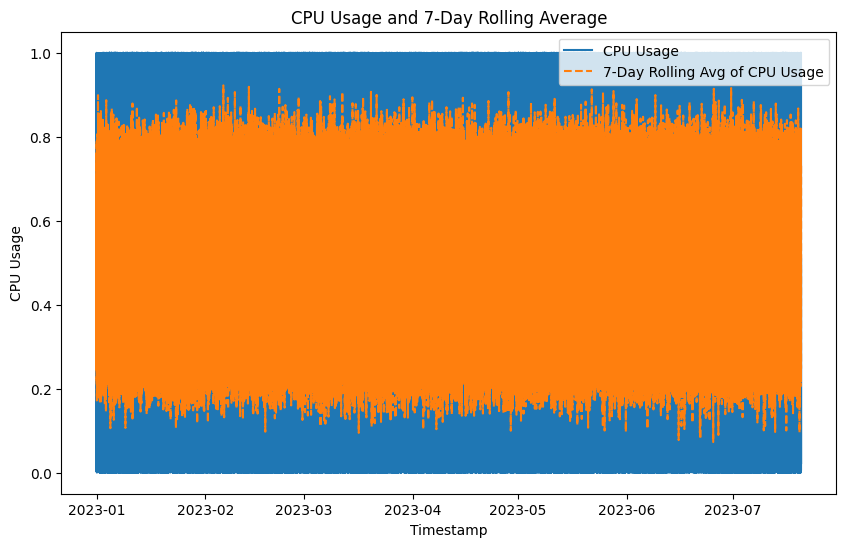

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(Cloud_data['timestamp'], Cloud_data['cpu_usage'], label='CPU Usage')
plt.plot(Cloud_data['timestamp'], Cloud_data['cpu_usage_7d_avg'], label='7-Day Rolling Avg of CPU Usage', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.title('CPU Usage and 7-Day Rolling Average')
plt.legend(loc='upper right')  # Set legend position
plt.show()


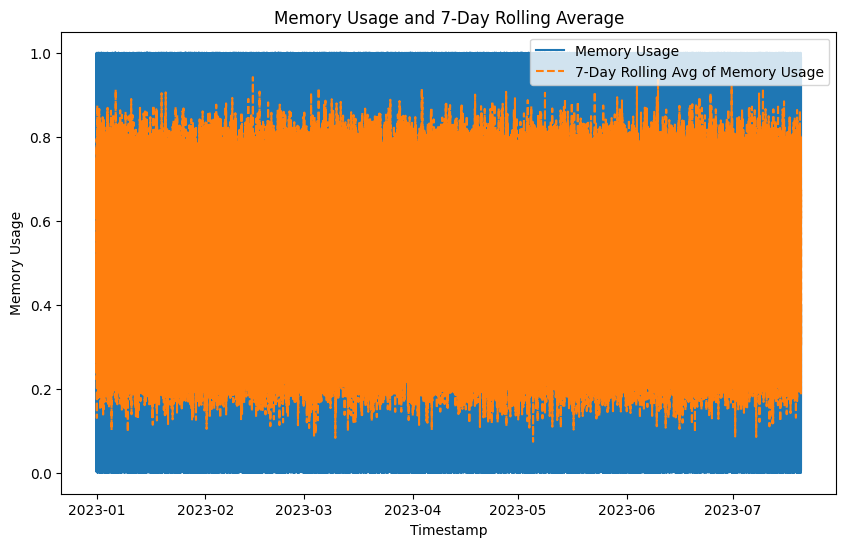

In [16]:
# Plotting the memory usage and its 7-day rolling avg
import matplotlib.pyplot as plt  # Make sure it's imported

plt.figure(figsize=(10, 6))
plt.plot(Cloud_data['timestamp'], Cloud_data['memory_usage'], label='Memory Usage')
plt.plot(Cloud_data['timestamp'], Cloud_data['memory_usage_7d_avg'], label='7-Day Rolling Avg of Memory Usage', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Memory Usage')
plt.title('Memory Usage and 7-Day Rolling Average')
plt.legend(loc='upper right')  # Set static legend position
plt.show()


In [17]:
from sklearn.impute import SimpleImputer

Cloud_data_processed = Cloud_data.drop(['timestamp', 'task_type', 'task_priority', 'task_status', 'vm_id'], axis=1)
Cloud_data_processed = Cloud_data_processed.apply(pd.to_numeric, errors='coerce')


In [18]:
imputer = SimpleImputer(strategy='mean')
Cloud_data_imputed_array = imputer.fit_transform(Cloud_data_processed)

Cloud_data_processed_imputed = pd.DataFrame(Cloud_data_imputed_array, columns=Cloud_data_processed.columns)


In [19]:
from sklearn.model_selection import train_test_split

X = Cloud_data_processed_imputed.drop(['cpu_usage', 'memory_usage', 'network_traffic'], axis=1)
y = Cloud_data_processed_imputed[['cpu_usage', 'memory_usage', 'network_traffic']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)


Training shape: (1600000, 8) (1600000, 3)
Testing shape: (400000, 8) (400000, 3)


In [20]:
import lightgbm as lgb

models_lgbm = {}
predictions_lgbm = {}

for target in y_train.columns:
    print(f"Training LightGBM model for target: {target}")
    model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, num_leaves=31, random_state=42)
    model.fit(X_train, y_train[target])
    models_lgbm[target] = model
    predictions_lgbm[target] = model.predict(X_test)


Training LightGBM model for target: cpu_usage
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1563
[LightGBM] [Info] Number of data points in the train set: 1600000, number of used features: 8
[LightGBM] [Info] Start training from score 0.500127
Training LightGBM model for target: memory_usage
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1563
[LightGBM] [Info] Number of data points in the train set: 1600000, number of used features: 8
[LightGBM] [Info] Start training from score 0.499858
Training LightGBM model for target: network_traffic
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Ligh

In [21]:
# After training your LightGBM model
print("Model trained with these features:")
print(model.feature_name_)


Model trained with these features:
['power_consumption', 'num_executed_instructions', 'execution_time', 'energy_efficiency', 'hour_of_day', 'day_of_week', 'cpu_usage_7d_avg', 'memory_usage_7d_avg']


In [22]:
import joblib
import os

# Set the full path to your Eclipse models folder
models_dir = r"C:\Users\yashraj\eclipse-workspace\cloudsim303\python_api\models"
os.makedirs(models_dir, exist_ok=True)

# Replace with your actual model object
model = models_lgbm['cpu_usage']  

# Define full model path
model_path = os.path.join(models_dir, "lgbm_cpu_usage.joblib")
joblib.dump(model, model_path)

# Print confirmation
print(f"✅ Model saved to: {model_path}")


✅ Model saved to: C:\Users\yashraj\eclipse-workspace\cloudsim303\python_api\models\lgbm_cpu_usage.joblib


In [23]:
import joblib
import os

# Set the full path to your Eclipse models folder
models_dir = r"C:\Users\yashraj\eclipse-workspace\cloudsim303\python_api\models"
os.makedirs(models_dir, exist_ok=True)

# Save CPU usage model
cpu_model = models_lgbm['cpu_usage']
cpu_model_path = os.path.join(models_dir, "lgbm_cpu_usage.joblib")
joblib.dump(cpu_model, cpu_model_path)
print(f"✅ CPU model saved to: {cpu_model_path}")

# Save Memory usage model
mem_model = models_lgbm['memory_usage']
mem_model_path = os.path.join(models_dir, "lgbm_memory_usage.joblib")
joblib.dump(mem_model, mem_model_path)
print(f"✅ Memory model saved to: {mem_model_path}")


✅ CPU model saved to: C:\Users\yashraj\eclipse-workspace\cloudsim303\python_api\models\lgbm_cpu_usage.joblib
✅ Memory model saved to: C:\Users\yashraj\eclipse-workspace\cloudsim303\python_api\models\lgbm_memory_usage.joblib


In [24]:
import joblib
import os

# Set the correct model directory path
models_dir = r"C:\Users\yashraj\eclipse-workspace\cloudsim303\python_api\models"
os.makedirs(models_dir, exist_ok=True)

# Save network traffic model
model = models_lgbm['network_traffic']
model_path = os.path.join(models_dir, "lgbm_network_traffic.joblib")
joblib.dump(model, model_path)

print(f"✅ Network traffic model saved to: {model_path}")


✅ Network traffic model saved to: C:\Users\yashraj\eclipse-workspace\cloudsim303\python_api\models\lgbm_network_traffic.joblib


In [25]:
import pandas as pd

# Combine LightGBM predictions into a DataFrame
y_pred_df = pd.DataFrame(predictions_lgbm, index=X_test.index)
y_pred_df.head()


,cpu_usage,memory_usage,network_traffic
1828401,0.435887,0.510303,0.502599
1200071,0.458151,0.511440,0.501555
194849,0.475205,0.596958,0.500102
1629054,0.320305,0.462818,0.500288
191144,0.638881,0.434619,0.500300


In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

print("Evaluation (RMSE) for LightGBM predictions:\n")
for target in y_test.columns:
    rmse = np.sqrt(mean_squared_error(y_test[target], y_pred_df[target]))
    print(f"{target}: RMSE = {rmse:.4f}")


Evaluation (RMSE) for LightGBM predictions:

cpu_usage: RMSE = 0.2540
memory_usage: RMSE = 0.2532
network_traffic: RMSE = 0.2740


In [27]:
import joblib
import os

# Create directory if not exists
os.makedirs("models", exist_ok=True)

# Save all LightGBM models
for target, model in models_lgbm.items():
    joblib.dump(model, f"models/lgbm_{target}.joblib")

print("All LightGBM models saved in 'models/' directory.")


All LightGBM models saved in 'models/' directory.


In [28]:
# Save LightGBM predictions to a CSV file
y_pred_df.to_csv("predictions_lightgbm.csv", index=False)
print("Predictions saved to 'predictions_lightgbm.csv'")


Predictions saved to 'predictions_lightgbm.csv'


In [29]:
import os
models_dir = "models"
